In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random

# Hyperparameters
NUM_EPOCHS = 50
LEARNING_RATE = 0.01
MESSAGE_SIZE = 3
STATE_SIZE = 3
ACTION_SIZE = 3
HIDDEN_SIZE = 16
BATCH_SIZE = 32

# Generate synthetic data: states and corresponding correct actions
states = torch.eye(STATE_SIZE)
correct_actions = torch.arange(ACTION_SIZE)

def get_batch(batch_size):
    indices = random.choices(range(STATE_SIZE), k=batch_size)
    return states[indices], correct_actions[indices]

# Neural network models for the agents
class Sender(nn.Module):
    def __init__(self, state_size, hidden_size, message_size):
        super(Sender, self).__init__()
        self.fc1 = nn.Linear(state_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, message_size)

    def forward(self, state):
        hidden = torch.relu(self.fc1(state))
        message = torch.sigmoid(self.fc2(hidden))  # Message bounded between 0 and 1
        return message

class Receiver(nn.Module):
    def __init__(self, message_size, hidden_size, action_size):
        super(Receiver, self).__init__()
        self.fc1 = nn.Linear(message_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, action_size)

    def forward(self, message):
        hidden = torch.relu(self.fc1(message))
        action_logits = self.fc2(hidden)
        return action_logits

# Initialize models, loss function, and optimizers
sender = Sender(STATE_SIZE, HIDDEN_SIZE, MESSAGE_SIZE)
receiver = Receiver(MESSAGE_SIZE, HIDDEN_SIZE, ACTION_SIZE)

criterion = nn.CrossEntropyLoss()
sender_optimizer = optim.Adam(sender.parameters(), lr=LEARNING_RATE)
receiver_optimizer = optim.Adam(receiver.parameters(), lr=LEARNING_RATE)

# Training loop
for epoch in range(NUM_EPOCHS):
    sender_optimizer.zero_grad()
    receiver_optimizer.zero_grad()

    # Generate a batch of data
    state_batch, action_batch = get_batch(BATCH_SIZE)

    # Forward pass
    messages = sender(state_batch)
    action_logits = receiver(messages)

    # Compute loss
    loss = criterion(action_logits, action_batch)

    # Backward pass and optimization
    loss.backward()
    sender_optimizer.step()
    receiver_optimizer.step()

    # Print progress every 500 epochs
    if (epoch + 1) % 5 == 0:
        print(f"Epoch {epoch + 1}/{NUM_EPOCHS}, Loss: {loss.item():.4f}")

# Analyze the language generated by the Sender
print("\nGenerated Language (Messages for each state):")
for i, state in enumerate(states):
    with torch.no_grad():
        message = sender(state.unsqueeze(0)).squeeze(0)
        print(f"State {i}: Message {message.numpy()}")

# Test the Receiver's performance
print("\nReceiver's Actions for each Message:")
correct = 0
for i, state in enumerate(states):
    with torch.no_grad():
        message = sender(state.unsqueeze(0))
        action_logits = receiver(message)
        action = torch.argmax(action_logits, dim=1).item()
        print(f"State {i}: Predicted Action {action}, Correct Action {correct_actions[i].item()}")
        if action == correct_actions[i].item():
            correct += 1

accuracy = correct / STATE_SIZE
print(f"\nReceiver Accuracy: {accuracy * 100:.2f}%")


Epoch 5/50, Loss: 1.0958
Epoch 10/50, Loss: 1.0913
Epoch 15/50, Loss: 1.0650
Epoch 20/50, Loss: 1.0518
Epoch 25/50, Loss: 1.0616
Epoch 30/50, Loss: 0.9078
Epoch 35/50, Loss: 0.8388
Epoch 40/50, Loss: 0.6474
Epoch 45/50, Loss: 0.6596
Epoch 50/50, Loss: 0.4725

Generated Language (Messages for each state):
State 0: Message [0.1748702 0.6528762 0.8297448]
State 1: Message [0.01477792 0.03889632 0.9646633 ]
State 2: Message [0.9719188  0.98040956 0.09841765]

Receiver's Actions for each Message:
State 0: Predicted Action 0, Correct Action 0
State 1: Predicted Action 1, Correct Action 1
State 2: Predicted Action 2, Correct Action 2

Receiver Accuracy: 100.00%


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random

# Hyperparameters
NUM_EPOCHS = 5000
LEARNING_RATE = 0.01
MESSAGE_SIZE = 1  # Message is now a single scalar value
STATE_SIZE = 5
ACTION_SIZE = 5
HIDDEN_SIZE = 16
BATCH_SIZE = 32

# Generate synthetic data: states and corresponding correct actions
states = torch.eye(STATE_SIZE)
correct_actions = torch.arange(ACTION_SIZE)

def get_batch(batch_size):
    indices = random.choices(range(STATE_SIZE), k=batch_size)
    return states[indices], correct_actions[indices]

# Neural network models for the agents
class Sender(nn.Module):
    def __init__(self, state_size, hidden_size, message_size):
        super(Sender, self).__init__()
        self.fc1 = nn.Linear(state_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, message_size)

    def forward(self, state):
        hidden = torch.relu(self.fc1(state))
        message = torch.sigmoid(self.fc2(hidden))  # Message bounded between 0 and 1
        return message

class Receiver(nn.Module):
    def __init__(self, message_size, hidden_size, action_size):
        super(Receiver, self).__init__()
        self.fc1 = nn.Linear(message_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, action_size)

    def forward(self, message):
        hidden = torch.relu(self.fc1(message))
        action_logits = self.fc2(hidden)
        return action_logits

# Initialize models, loss function, and optimizers
sender = Sender(STATE_SIZE, HIDDEN_SIZE, MESSAGE_SIZE)
receiver = Receiver(MESSAGE_SIZE, HIDDEN_SIZE, ACTION_SIZE)

criterion = nn.CrossEntropyLoss()
sender_optimizer = optim.Adam(sender.parameters(), lr=LEARNING_RATE)
receiver_optimizer = optim.Adam(receiver.parameters(), lr=LEARNING_RATE)

# Training loop
for epoch in range(NUM_EPOCHS):
    sender_optimizer.zero_grad()
    receiver_optimizer.zero_grad()

    # Generate a batch of data
    state_batch, action_batch = get_batch(BATCH_SIZE)

    # Forward pass
    messages = sender(state_batch)
    action_logits = receiver(messages)

    # Compute loss
    loss = criterion(action_logits, action_batch)

    # Backward pass and optimization
    loss.backward()
    sender_optimizer.step()
    receiver_optimizer.step()

    # Logging
    if (epoch + 1) % 500 == 0:
        print(f"Epoch [{epoch + 1}/{NUM_EPOCHS}], Loss: {loss.item():.4f}")

# Inspect the learned messages and evaluate the system
print("Learned messages:")
for i in range(STATE_SIZE):
    state = states[i].unsqueeze(0)  # Add batch dimension
    message = sender(state).detach().numpy()
    print(f"State: {state.numpy()}, Message: {message}")

correct = 0
for i in range(STATE_SIZE):
    state = states[i].unsqueeze(0)
    message = sender(state)
    action_logits = receiver(message)
    predicted_action = action_logits.argmax(dim=1).item()
    if predicted_action == correct_actions[i].item():
        correct += 1
accuracy = correct / STATE_SIZE
print(f"Final accuracy: {accuracy * 100:.2f}%")


Epoch [500/5000], Loss: 0.3967
Epoch [1000/5000], Loss: 0.0100
Epoch [1500/5000], Loss: 0.0033
Epoch [2000/5000], Loss: 0.0015
Epoch [2500/5000], Loss: 0.0010
Epoch [3000/5000], Loss: 0.0006
Epoch [3500/5000], Loss: 0.0004
Epoch [4000/5000], Loss: 0.0002
Epoch [4500/5000], Loss: 0.0002
Epoch [5000/5000], Loss: 0.0001
Learned messages:
State: [[1. 0. 0. 0. 0.]], Message: [[0.44974348]]
State: [[0. 1. 0. 0. 0.]], Message: [[0.6985548]]
State: [[0. 0. 1. 0. 0.]], Message: [[0.20299342]]
State: [[0. 0. 0. 1. 0.]], Message: [[0.9998623]]
State: [[0. 0. 0. 0. 1.]], Message: [[5.348929e-05]]
Final accuracy: 100.00%


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random

# Hyperparameters
NUM_EPOCHS = 5000
LEARNING_RATE = 0.01
MESSAGE_SIZE = 1  # Message is now a single scalar value
STATE_SIZE = 3
ACTION_SIZE = 3
HIDDEN_SIZE = 16
BATCH_SIZE = 32

# Generate synthetic data: states and corresponding correct actions
states = torch.eye(STATE_SIZE)
correct_actions = torch.arange(ACTION_SIZE)

def get_batch(batch_size):
    indices = random.choices(range(STATE_SIZE), k=batch_size)
    return states[indices], correct_actions[indices]

# Neural network models for the agents
class Sender(nn.Module):
    def __init__(self, state_size, hidden_size, message_size):
        super(Sender, self).__init__()
        self.fc1 = nn.Linear(state_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, message_size)

    def forward(self, state):
        hidden = torch.relu(self.fc1(state))
        message = torch.sigmoid(self.fc2(hidden))  # Message bounded between 0 and 1
        return message

class Receiver(nn.Module):
    def __init__(self, message_size, hidden_size, action_size):
        super(Receiver, self).__init__()
        self.fc1 = nn.Linear(message_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, action_size)

    def forward(self, message):
        hidden = torch.relu(self.fc1(message))
        action_logits = self.fc2(hidden)
        return action_logits

# Initialize models, loss function, and optimizers
sender = Sender(STATE_SIZE, HIDDEN_SIZE, MESSAGE_SIZE)
receiver = Receiver(MESSAGE_SIZE, HIDDEN_SIZE, STATE_SIZE)  # Receiver now outputs states
feedback_sender = Sender(MESSAGE_SIZE, HIDDEN_SIZE, MESSAGE_SIZE)  # Sender to process receiver's message
final_receiver = Receiver(MESSAGE_SIZE, HIDDEN_SIZE, ACTION_SIZE)  # Final receiver

criterion = nn.CrossEntropyLoss()
sender_optimizer = optim.Adam(list(sender.parameters()) + list(feedback_sender.parameters()), lr=LEARNING_RATE)
receiver_optimizer = optim.Adam(list(receiver.parameters()) + list(final_receiver.parameters()), lr=LEARNING_RATE)

# Training loop
for epoch in range(NUM_EPOCHS):
    sender_optimizer.zero_grad()
    receiver_optimizer.zero_grad()

    # Generate a batch of data
    state_batch, action_batch = get_batch(BATCH_SIZE)

    # Forward pass through the first sender and receiver
    messages = sender(state_batch)
    reconstructed_states = receiver(messages)

    # Forward pass through the feedback sender and final receiver
    feedback_messages = feedback_sender(reconstructed_states)
    action_logits = final_receiver(feedback_messages)

    # Compute loss
    loss = criterion(action_logits, action_batch)

    # Backward pass and optimization
    loss.backward()
    sender_optimizer.step()
    receiver_optimizer.step()

    # Logging
    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Inspect messages and accuracy
for i in range(STATE_SIZE):
    state = states[i].unsqueeze(0)  # Add batch dimension
    message = sender(state)
    reconstructed_state = receiver(message)
    feedback_message = feedback_sender(reconstructed_state)
    action_logits = final_receiver(feedback_message)
    predicted_action = action_logits.argmax(dim=1).item()
    print(f"State: {state.numpy()}, Message1: {message.detach().numpy()}, Reconstructed State: {reconstructed_state.detach().numpy()}, Message2: {feedback_message.detach().numpy()}, Predicted Action: {predicted_action}")


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x3 and 1x16)

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random

# Hyperparameters
NUM_EPOCHS = 5000
LEARNING_RATE = 0.01
MESSAGE_SIZE = 1  # Single value per message
STATE_SIZE = 3
ACTION_SIZE = 3
HIDDEN_SIZE = 16
BATCH_SIZE = 32

# Generate synthetic data: states and corresponding correct actions
states = torch.eye(STATE_SIZE)
correct_actions = torch.arange(ACTION_SIZE)

def get_batch(batch_size):
    indices = random.choices(range(STATE_SIZE), k=batch_size)
    return states[indices], correct_actions[indices]

# Define the agent model
class Agent(nn.Module):
    def __init__(self, input_size, hidden_size, message_size):
        super(Agent, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2_message = nn.Linear(hidden_size, message_size)
        self.fc2_action = nn.Linear(hidden_size, ACTION_SIZE)

    def forward(self, input_data):
        hidden = torch.relu(self.fc1(input_data))
        message = torch.sigmoid(self.fc2_message(hidden))  # Message bounded between 0 and 1
        action_logits = self.fc2_action(hidden)
        return message, action_logits

# Initialize agents
agent1 = Agent(STATE_SIZE + MESSAGE_SIZE, HIDDEN_SIZE, MESSAGE_SIZE)
agent2 = Agent(STATE_SIZE + MESSAGE_SIZE, HIDDEN_SIZE, MESSAGE_SIZE)

# Loss and optimizers
criterion = nn.CrossEntropyLoss()
optimizer1 = optim.Adam(agent1.parameters(), lr=LEARNING_RATE)
optimizer2 = optim.Adam(agent2.parameters(), lr=LEARNING_RATE)

# Training loop
for epoch in range(NUM_EPOCHS):
    optimizer1.zero_grad()
    optimizer2.zero_grad()

    # Generate a batch of data
    state_batch, action_batch = get_batch(BATCH_SIZE)
    initial_message = torch.zeros(BATCH_SIZE, MESSAGE_SIZE)  # Initial message

    # Agent 1 sends the first message
    input1 = torch.cat((state_batch, initial_message), dim=1)
    message1, _ = agent1(input1)

    # Agent 2 receives the message, processes it, and sends a response
    input2 = torch.cat((state_batch, message1), dim=1)
    message2, action_logits2 = agent2(input2)

    # Agent 1 receives the response and takes a final action
    input1_response = torch.cat((state_batch, message2), dim=1)
    _, action_logits1 = agent1(input1_response)

    # Compute losses
    loss1 = criterion(action_logits1, action_batch)
    loss2 = criterion(action_logits2, action_batch)

    # Backpropagation
    total_loss = loss1 + loss2
    total_loss.backward()

    optimizer1.step()
    optimizer2.step()

    # Logging progress
    if (epoch + 1) % 500 == 0:
        print(f"Epoch {epoch + 1}/{NUM_EPOCHS}, Loss: {total_loss.item()}")

# Inspect messages and actions
for i in range(STATE_SIZE):
    state = states[i].unsqueeze(0)
    initial_message = torch.zeros(1, MESSAGE_SIZE)

    # Agent 1 sends the first message
    input1 = torch.cat((state, initial_message), dim=1)
    message1, _ = agent1(input1)

    # Agent 2 responds
    input2 = torch.cat((state, message1), dim=1)
    message2, action_logits2 = agent2(input2)

    # Agent 1 final action
    input1_response = torch.cat((state, message2), dim=1)
    _, action_logits1 = agent1(input1_response)

    print(f"State: {state.numpy()}, Message1: {message1.detach().numpy()}, Message2: {message2.detach().numpy()}, Final Action: {action_logits1.argmax(dim=1).item()}")


Epoch 500/5000, Loss: 0.0012976792640984058
Epoch 1000/5000, Loss: 0.00032549319439567626
Epoch 1500/5000, Loss: 0.00016904546646401286
Epoch 2000/5000, Loss: 9.745090210344642e-05
Epoch 2500/5000, Loss: 5.564751336351037e-05
Epoch 3000/5000, Loss: 3.43170395353809e-05
Epoch 3500/5000, Loss: 2.369268622715026e-05
Epoch 4000/5000, Loss: 1.610063191037625e-05
Epoch 4500/5000, Loss: 1.1816582627943717e-05
Epoch 5000/5000, Loss: 9.141838745563291e-06
State: [[1. 0. 0.]], Message1: [[0.9830784]], Message2: [[0.01434786]], Final Action: 0
State: [[0. 1. 0.]], Message1: [[0.99918836]], Message2: [[0.00651736]], Final Action: 1
State: [[0. 0. 1.]], Message1: [[0.02370292]], Message2: [[0.99716705]], Final Action: 2


In [ ]:
# Redes Neuronales y Entrenamiento de Agentes con Comunicación Bidireccional
import torch
import torch.nn as nn
import torch.optim as optim
import random

# Hyperparámetros
NUM_EPOCHS = 100
LEARNING_RATE = 0.01
MESSAGE_SIZE = 1
STATE_SIZE = 3
ACTION_SIZE = 3
HIDDEN_SIZE = 16
BATCH_SIZE = 32

# Generar datos sintéticos
states = torch.eye(STATE_SIZE)
correct_actions = torch.arange(ACTION_SIZE)

# Generar lotes de entrenamiento
def get_batch(batch_size):
    indices = random.choices(range(STATE_SIZE), k=batch_size)
    return states[indices], correct_actions[indices]

# Modelo de Agente
class Agent(nn.Module):
    def __init__(self, input_size, hidden_size, message_size):
        super(Agent, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2_message = nn.Linear(hidden_size, message_size)
        self.fc2_action = nn.Linear(hidden_size, ACTION_SIZE)

    def forward(self, input_data):
        hidden = torch.relu(self.fc1(input_data))
        message = torch.sigmoid(self.fc2_message(hidden))
        action_logits = self.fc2_action(hidden)
        return message, action_logits

# Inicializar agentes
agent1 = Agent(STATE_SIZE + MESSAGE_SIZE, HIDDEN_SIZE, MESSAGE_SIZE)
agent2 = Agent(STATE_SIZE + MESSAGE_SIZE, HIDDEN_SIZE, MESSAGE_SIZE)

# Función de pérdida y optimizadores
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(list(agent1.parameters()) + list(agent2.parameters()), lr=LEARNING_RATE)

# Entrenamiento
for epoch in range(NUM_EPOCHS):
    optimizer.zero_grad()

    # Obtener un lote
    state_batch, action_batch = get_batch(BATCH_SIZE)

    # Mensaje inicial (todo ceros)
    message1_to_2 = torch.zeros((BATCH_SIZE, MESSAGE_SIZE))

    # Agente 1 envía mensaje al Agente 2
    input1 = torch.cat((state_batch, message1_to_2), dim=1)
    message2_to_1, _ = agent1(input1)

    # Agente 2 envía mensaje de regreso a Agente 1
    input2 = torch.cat((state_batch, message2_to_1), dim=1)
    message1_final, action_logits2 = agent2(input2)

    # Agente 1 toma una decisión final basada en el mensaje recibido
    input1_final = torch.cat((state_batch, message1_final), dim=1)
    _, action_logits1 = agent1(input1_final)

    # Calcular pérdida
    loss1 = criterion(action_logits1, action_batch)
    loss2 = criterion(action_logits2, action_batch)
    loss = loss1 + loss2

    # Optimización
    loss.backward()
    optimizer.step()

    # Imprimir evolución cada 500 épocas
    if epoch % 5 == 0:
        print(f"Época {epoch}, Pérdida: {loss.item():.4f}")

# Evaluación de la comunicación emergente
print("\\nEvolución de la Comunicación:")
for i in range(STATE_SIZE):
    state = states[i].unsqueeze(0)
    message1_to_2 = torch.zeros((1, MESSAGE_SIZE))

    # Comunicación entre agentes
    input1 = torch.cat((state, message1_to_2), dim=1)
    message2_to_1, _ = agent1(input1)

    input2 = torch.cat((state, message2_to_1), dim=1)
    message1_final, _ = agent2(input2)

    print(f"Estado: {state.numpy()}, Mensaje Agente 1 -> 2: {message2_to_1.item():.4f}, "
          f"Mensaje Agente 2 -> 1: {message1_final.item():.4f}")


Época 0, Pérdida: 2.2684
Época 5, Pérdida: 2.0947
Época 10, Pérdida: 1.8260
Época 15, Pérdida: 1.5284
Época 20, Pérdida: 1.3096
Época 25, Pérdida: 0.9657
Época 30, Pérdida: 0.7049
Época 35, Pérdida: 0.4866
Época 40, Pérdida: 0.3367
Época 45, Pérdida: 0.2009
Época 50, Pérdida: 0.1355
Época 55, Pérdida: 0.1008
Época 60, Pérdida: 0.0692
Época 65, Pérdida: 0.0505
Época 70, Pérdida: 0.0392
Época 75, Pérdida: 0.0316
Época 80, Pérdida: 0.0268
Época 85, Pérdida: 0.0228
Época 90, Pérdida: 0.0200
Época 95, Pérdida: 0.0177
\nEvolución de la Comunicación:
Estado: [[1. 0. 0.]], Mensaje Agente 1 -> 2: 0.9753, Mensaje Agente 2 -> 1: 0.9493
Estado: [[0. 1. 0.]], Mensaje Agente 1 -> 2: 0.9612, Mensaje Agente 2 -> 1: 0.9610
Estado: [[0. 0. 1.]], Mensaje Agente 1 -> 2: 0.3432, Mensaje Agente 2 -> 1: 0.9238


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random

# Hyperparameters
NUM_EPOCHS = 100
LEARNING_RATE = 0.01
MESSAGE_SIZE = 1  # Single value per message
STATE_SIZE = 5
ACTION_SIZE = 5
HIDDEN_SIZE = 16
BATCH_SIZE = 32

# Generate synthetic data: states and corresponding correct actions
states = torch.eye(STATE_SIZE)
correct_actions = torch.arange(ACTION_SIZE)

def get_batch(batch_size):
    indices = random.choices(range(STATE_SIZE), k=batch_size)
    return states[indices], correct_actions[indices]

# Define the agent model
class Agent(nn.Module):
    def __init__(self, input_size, hidden_size, message_size):
        super(Agent, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2_message = nn.Linear(hidden_size, message_size)
        self.fc2_action = nn.Linear(hidden_size, ACTION_SIZE)

    def forward(self, input_data):
        hidden = torch.relu(self.fc1(input_data))
        message = torch.sigmoid(self.fc2_message(hidden))  # Message bounded between 0 and 1
        action_logits = self.fc2_action(hidden)
        return message, action_logits

# Initialize agents
agent1 = Agent(STATE_SIZE + MESSAGE_SIZE, HIDDEN_SIZE, MESSAGE_SIZE)
agent2 = Agent(STATE_SIZE + MESSAGE_SIZE, HIDDEN_SIZE, MESSAGE_SIZE)

# Loss and optimizers
criterion = nn.CrossEntropyLoss()
optimizer1 = optim.Adam(agent1.parameters(), lr=LEARNING_RATE)
optimizer2 = optim.Adam(agent2.parameters(), lr=LEARNING_RATE)

# Training loop
for epoch in range(NUM_EPOCHS):
    optimizer1.zero_grad()
    optimizer2.zero_grad()

    # Generate a batch of data
    state_batch, action_batch = get_batch(BATCH_SIZE)
    initial_message = torch.zeros(BATCH_SIZE, MESSAGE_SIZE)  # Initial message

    # Agent 1 sends the first message
    input1 = torch.cat((state_batch, initial_message), dim=1)
    message1, _ = agent1(input1)

    # Agent 2 receives the message, processes it, and sends a response
    input2 = torch.cat((state_batch, message1), dim=1)
    message2, action_logits2 = agent2(input2)

    # Agent 1 receives the response and takes a final action
    input1_response = torch.cat((state_batch, message2), dim=1)
    _, action_logits1 = agent1(input1_response)

    # Compute losses
    loss1 = criterion(action_logits1, action_batch)
    loss2 = criterion(action_logits2, action_batch)

    # Backpropagation
    total_loss = loss1 + loss2
    total_loss.backward()

    optimizer1.step()
    optimizer2.step()

    # Log results every 500 epochs
    if (epoch + 1) % 5 == 0:
        print(f"Epoch {epoch + 1}/{NUM_EPOCHS}")
        print(f"Loss1: {loss1.item():.4f}, Loss2: {loss2.item():.4f}")

        # Show some messages and actions
        for i in range(5):  # Display for first 3 states
            state = states[i].unsqueeze(0)
            initial_message = torch.zeros(1, MESSAGE_SIZE)

            input1 = torch.cat((state, initial_message), dim=1)
            message1, _ = agent1(input1)

            input2 = torch.cat((state, message1), dim=1)
            message2, action_logits2 = agent2(input2)

            input1_response = torch.cat((state, message2), dim=1)
            _, action_logits1 = agent1(input1_response)

            print(f"  State: {state.numpy().flatten()}")
            print(f"  Message1: {message1.detach().numpy().flatten()}")
            print(f"  Message2: {message2.detach().numpy().flatten()}")
            print(f"  Action2: {action_logits2.argmax(dim=1).item()}, Action1: {action_logits1.argmax(dim=1).item()}")


Epoch 5/100
Loss1: 1.6004, Loss2: 1.5896
  State: [1. 0. 0. 0. 0.]
  Message1: [0.54031336]
  Message2: [0.48619798]
  Action2: 1, Action1: 1
  State: [0. 1. 0. 0. 0.]
  Message1: [0.53372437]
  Message2: [0.5287939]
  Action2: 1, Action1: 3
  State: [0. 0. 1. 0. 0.]
  Message1: [0.5631246]
  Message2: [0.50661886]
  Action2: 1, Action1: 3
  State: [0. 0. 0. 1. 0.]
  Message1: [0.5530909]
  Message2: [0.50247926]
  Action2: 1, Action1: 3
  State: [0. 0. 0. 0. 1.]
  Message1: [0.52037525]
  Message2: [0.5054932]
  Action2: 1, Action1: 3
Epoch 10/100
Loss1: 1.4597, Loss2: 1.4484
  State: [1. 0. 0. 0. 0.]
  Message1: [0.54158807]
  Message2: [0.50353175]
  Action2: 0, Action1: 1
  State: [0. 1. 0. 0. 0.]
  Message1: [0.5418952]
  Message2: [0.5275436]
  Action2: 1, Action1: 1
  State: [0. 0. 1. 0. 0.]
  Message1: [0.5894121]
  Message2: [0.51042616]
  Action2: 1, Action1: 2
  State: [0. 0. 0. 1. 0.]
  Message1: [0.5684534]
  Message2: [0.52803236]
  Action2: 1, Action1: 3
  State: [0. 0. 

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random

# Hyperparameters
STATE_SIZE = 5         # Size of the 1D environment
ACTION_SIZE = 3        # Left, Stay, Right
HIDDEN_SIZE = 16
LEARNING_RATE = 0.01
NUM_EPOCHS = 5000
BATCH_SIZE = 32

# Environment: Simple 1D world
class SimpleWorld:
    def __init__(self, size, goal_position):
        self.size = size
        self.goal_position = goal_position

    def step(self, state, action):
        """
        Simulates one step in the environment.
        Args:
            state (torch.Tensor): One-hot encoded current state.
            action (int): Action index (0=Left, 1=Stay, 2=Right).
        Returns:
            next_state (torch.Tensor): One-hot encoded next state.
            reward (float): Reward for the transition.
        """
        position = torch.argmax(state).item()
        if action == 0:  # Move left
            position = max(0, position - 1)
        elif action == 2:  # Move right
            position = min(self.size - 1, position + 1)
        next_state = torch.zeros(self.size)
        next_state[position] = 1
        reward = 1.0 if position == self.goal_position else -0.1
        return next_state, reward

# Model of the world
class WorldModel(nn.Module):
    def __init__(self, state_size, action_size, hidden_size):
        super(WorldModel, self).__init__()
        self.fc1 = nn.Linear(state_size + action_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, state_size)

    def forward(self, state, action):
        x = torch.cat((state, action), dim=1)
        hidden = torch.relu(self.fc1(x))
        next_state_pred = torch.softmax(self.fc2(hidden), dim=1)
        return next_state_pred

# Training data generation
def generate_data(env, num_samples=1000):
    states = []
    actions = []
    next_states = []
    for _ in range(num_samples):
        state = torch.eye(env.size)[random.randint(0, env.size - 1)]
        action = torch.eye(ACTION_SIZE)[random.randint(0, ACTION_SIZE - 1)]
        next_state, _ = env.step(state, torch.argmax(action).item())
        states.append(state)
        actions.append(action)
        next_states.append(next_state)
    return torch.stack(states), torch.stack(actions), torch.stack(next_states)

# Training the world model
def train_world_model(world_model, optimizer, criterion, states, actions, next_states, epochs):
    for epoch in range(epochs):
        optimizer.zero_grad()
        predictions = world_model(states, actions)
        loss = criterion(predictions, next_states)
        loss.backward()
        optimizer.step()
        if (epoch + 1) % 200 == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}")

# Agent planning with the world model
def plan_with_model(world_model, env, state, max_steps=10):
    total_reward = 0
    print("Planning starts...")
    for step in range(max_steps):
        # Try all actions and predict outcomes
        action_values = []
        for action_idx in range(ACTION_SIZE):
            action = torch.eye(ACTION_SIZE)[action_idx].unsqueeze(0)
            next_state_pred = world_model(state.unsqueeze(0), action).squeeze(0)
            reward = -0.1
            if torch.argmax(next_state_pred) == env.goal_position:
                reward = 1.0
            action_values.append(reward)
        # Choose the best action
        best_action = int(np.argmax(action_values))
        print(f"Step {step + 1}: Action={best_action}, Predicted reward={action_values[best_action]:.2f}")
        # Simulate action in the real environment
        state, reward = env.step(state, best_action)
        total_reward += reward
        print(f"Actual state: {state.numpy()}, Reward: {reward:.2f}")
        if reward == 1.0:  # Goal reached
            break
    print(f"Total Reward: {total_reward:.2f}")

# Main function
if __name__ == "__main__":
    # Initialize environment and world model
    env = SimpleWorld(size=STATE_SIZE, goal_position=STATE_SIZE - 1)
    world_model = WorldModel(state_size=STATE_SIZE, action_size=ACTION_SIZE, hidden_size=HIDDEN_SIZE)
    optimizer = optim.Adam(world_model.parameters(), lr=LEARNING_RATE)
    criterion = nn.MSELoss()

    # Generate training data
    states, actions, next_states = generate_data(env)

    # Train the model of the world
    train_world_model(world_model, optimizer, criterion, states, actions, next_states, NUM_EPOCHS)

    # Use the trained model to plan
    initial_state = torch.eye(STATE_SIZE)[0]  # Start at position 0
    plan_with_model(world_model, env, initial_state)


Epoch 200/5000, Loss: 0.0002
Epoch 400/5000, Loss: 0.0001
Epoch 600/5000, Loss: 0.0000
Epoch 800/5000, Loss: 0.0000
Epoch 1000/5000, Loss: 0.0000
Epoch 1200/5000, Loss: 0.0000
Epoch 1400/5000, Loss: 0.0000
Epoch 1600/5000, Loss: 0.0000
Epoch 1800/5000, Loss: 0.0000
Epoch 2000/5000, Loss: 0.0000
Epoch 2200/5000, Loss: 0.0000
Epoch 2400/5000, Loss: 0.0000
Epoch 2600/5000, Loss: 0.0000
Epoch 2800/5000, Loss: 0.0000
Epoch 3000/5000, Loss: 0.0000
Epoch 3200/5000, Loss: 0.0000
Epoch 3400/5000, Loss: 0.0000
Epoch 3600/5000, Loss: 0.0000
Epoch 3800/5000, Loss: 0.0000
Epoch 4000/5000, Loss: 0.0000
Epoch 4200/5000, Loss: 0.0000
Epoch 4400/5000, Loss: 0.0000
Epoch 4600/5000, Loss: 0.0000
Epoch 4800/5000, Loss: 0.0000
Epoch 5000/5000, Loss: 0.0000
Planning starts...
Step 1: Action=0, Predicted reward=-0.10
Actual state: [1. 0. 0. 0. 0.], Reward: -0.10
Step 2: Action=0, Predicted reward=-0.10
Actual state: [1. 0. 0. 0. 0.], Reward: -0.10
Step 3: Action=0, Predicted reward=-0.10
Actual state: [1. 0.

# imagenes

<class 'int'>


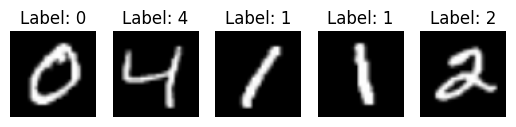

Epoch 5/10, Loss: 0.4531
Epoch 10/10, Loss: 0.1149
Image 0: Predicted Label 1, True Label 0
Image 1: Predicted Label 1, True Label 4
Image 2: Predicted Label 1, True Label 1
Image 3: Predicted Label 1, True Label 1
Image 4: Predicted Label 1, True Label 2

Receiver Accuracy: 40.00%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
import random

# Hyperparameters
NUM_EPOCHS = 10
LEARNING_RATE = 0.01
MESSAGE_SIZE = 1
HIDDEN_SIZE = 16
BATCH_SIZE = 32
ACTION_SIZE = 5  # 5 images from MNIST

# Define image transformation (resize to 64x64 and normalize)
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Redimensionar a 64x64
    transforms.ToTensor(),  # Convertir a tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalizar entre -1 y 1
])

# Cargar el conjunto de datos MNIST
mnist_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Seleccionamos 5 imágenes aleatorias
indices = random.sample(range(len(mnist_dataset)), 5)
images, labels = zip(*[mnist_dataset[i] for i in [1,2,3,6,5]])
print(type(labels[0]))
# labels = [1,2,3,4,5]
# Visualizar las imágenes seleccionadas (opcional)
import matplotlib.pyplot as plt
for i, img in enumerate(images):
    plt.subplot(1, 5, i + 1)
    plt.imshow(img.permute(1, 2, 0).numpy().squeeze(), cmap='gray')
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')
plt.show()

# Define the Sender (CNN that takes an image and generates a message)
class Sender(nn.Module):
    def __init__(self, message_size):
        super(Sender, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 64 * 64, 128)
        self.fc2 = nn.Linear(128, message_size)

    def forward(self, image):
        x = torch.relu(self.conv1(image))
        x = torch.relu(self.conv2(x))
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = torch.relu(self.fc1(x))
        message = torch.sigmoid(self.fc2(x))  # Message bounded between 0 and 1
        return message

# Define the Receiver (MLP that takes a message and predicts an image)
class Receiver(nn.Module):
    def __init__(self, message_size, action_size):
        super(Receiver, self).__init__()
        self.fc1 = nn.Linear(message_size, 128)
        self.fc2 = nn.Linear(128, action_size)

    def forward(self, message):
        x = torch.relu(self.fc1(message))
        action_logits = self.fc2(x)
        return action_logits

# Initialize models, loss function, and optimizers
sender = Sender(MESSAGE_SIZE)
receiver = Receiver(MESSAGE_SIZE, ACTION_SIZE)

criterion = nn.CrossEntropyLoss()
sender_optimizer = optim.Adam(sender.parameters(), lr=LEARNING_RATE)
receiver_optimizer = optim.Adam(receiver.parameters(), lr=LEARNING_RATE)

# Training loop
for epoch in range(NUM_EPOCHS):
    sender_optimizer.zero_grad()
    receiver_optimizer.zero_grad()

    # Randomly select a batch of images
    selected_indices = random.sample(range(5), 1)
    selected_image = images[selected_indices[0]].unsqueeze(0)  # Add batch dimension
    selected_label = labels[selected_indices[0]]

    # Forward pass through Sender
    messages = sender(selected_image)

    # Forward pass through Receiver
    action_logits = receiver(messages)

    # Compute loss
    loss = criterion(action_logits, torch.tensor([selected_label]))

    # Backward pass and optimization
    loss.backward()
    sender_optimizer.step()
    receiver_optimizer.step()

    # Print progress every 5 epochs
    if (epoch + 1) % 5 == 0:
        print(f"Epoch {epoch + 1}/{NUM_EPOCHS}, Loss: {loss.item():.4f}")

# Test the Receiver's performance
correct = 0
for i in range(5):
    with torch.no_grad():
        selected_image = images[i].unsqueeze(0)  # Add batch dimension
        message = sender(selected_image)
        action_logits = receiver(message)
        predicted_label = torch.argmax(action_logits, dim=1).item()
        print(f"Image {i}: Predicted Label {predicted_label}, True Label {labels[i]}")
        if predicted_label == labels[i]:
            correct += 1

accuracy = correct / 5
print(f"\nReceiver Accuracy: {accuracy * 100:.2f}%")


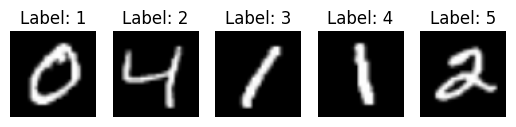

Epoch 5/10, Loss: 0.3256
Epoch 10/10, Loss: 0.0265
Image 0: Predicted Label 2, True Label 1
Image 1: Predicted Label 2, True Label 2
Image 2: Predicted Label 2, True Label 3
Image 3: Predicted Label 2, True Label 4
Image 4: Predicted Label 2, True Label 5

Receiver Accuracy: 20.00%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
import random

# Hyperparameters
NUM_EPOCHS = 10
LEARNING_RATE = 0.01
MESSAGE_SIZE = 1
HIDDEN_SIZE = 16
BATCH_SIZE = 32
ACTION_SIZE = 5  # 5 images from MNIST

# Define image transformation (resize to 64x64 and normalize)
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Redimensionar a 64x64
    transforms.ToTensor(),  # Convertir a tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalizar entre -1 y 1
])

# Cargar el conjunto de datos MNIST
mnist_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Seleccionamos 5 imágenes aleatorias
indices = random.sample(range(len(mnist_dataset)), 5)
images, labels = zip(*[mnist_dataset[i] for i in [1,2,3,6,5]])
# print(type(labels[0]))
labels = (1,2,3,4,5)
# Visualizar las imágenes seleccionadas (opcional)
import matplotlib.pyplot as plt
for i, img in enumerate(images):
    plt.subplot(1, 5, i + 1)
    plt.imshow(img.permute(1, 2, 0).numpy().squeeze(), cmap='gray')
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')
plt.show()

# Define the Sender (CNN that takes an image and generates a message)
class Sender(nn.Module):
    def __init__(self, message_size):
        super(Sender, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 64 * 64, 128)
        self.fc2 = nn.Linear(128, message_size)

    def forward(self, image):
        x = torch.relu(self.conv1(image))
        x = torch.relu(self.conv2(x))
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = torch.relu(self.fc1(x))
        message = torch.sigmoid(self.fc2(x))  # Message bounded between 0 and 1
        return message

# Define the Receiver (MLP that takes a message and predicts an image)
class Receiver(nn.Module):
    def __init__(self, message_size, action_size):
        super(Receiver, self).__init__()
        self.fc1 = nn.Linear(message_size, 128)
        self.fc2 = nn.Linear(128, action_size)

    def forward(self, message):
        x = torch.relu(self.fc1(message))
        action_logits = self.fc2(x)
        return action_logits

# Initialize models, loss function, and optimizers
sender = Sender(MESSAGE_SIZE)
receiver = Receiver(MESSAGE_SIZE, ACTION_SIZE)

criterion = nn.CrossEntropyLoss()
sender_optimizer = optim.Adam(sender.parameters(), lr=LEARNING_RATE)
receiver_optimizer = optim.Adam(receiver.parameters(), lr=LEARNING_RATE)

# Training loop
for epoch in range(NUM_EPOCHS):
    sender_optimizer.zero_grad()
    receiver_optimizer.zero_grad()

    # Randomly select a batch of images
    selected_indices = (1,2,3,4,5)
    selected_image = images[selected_indices[0]].unsqueeze(0)  # Add batch dimension
    selected_label = labels[selected_indices[0]]

    # Forward pass through Sender
    messages = sender(selected_image)

    # Forward pass through Receiver
    action_logits = receiver(messages)

    # Compute loss
    loss = criterion(action_logits, torch.tensor([selected_label]))

    # Backward pass and optimization
    loss.backward()
    sender_optimizer.step()
    receiver_optimizer.step()

    # Print progress every 5 epochs
    if (epoch + 1) % 5 == 0:
        print(f"Epoch {epoch + 1}/{NUM_EPOCHS}, Loss: {loss.item():.4f}")

# Test the Receiver's performance
correct = 0
for i in range(5):
    with torch.no_grad():
        selected_image = images[i].unsqueeze(0)  # Add batch dimension
        message = sender(selected_image)
        action_logits = receiver(message)
        predicted_label = torch.argmax(action_logits, dim=1).item()
        print(f"Image {i}: Predicted Label {predicted_label}, True Label {labels[i]}")
        if predicted_label == labels[i]:
            correct += 1

accuracy = correct / 5
print(f"\nReceiver Accuracy: {accuracy * 100:.2f}%")


# emojis


In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

# Cargar modelo ligero (SLM)
model_name = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"  # Modelo optimizado para chat
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# Función para traducir texto a emojis
def text_to_emoji(text):
    prompt = f"Traduce esta frase a emojis:\nTexto: {text}\nEmoji:"

    inputs = tokenizer(prompt, return_tensors="pt")
    with torch.no_grad():
        output = model.generate(**inputs, max_length=50, do_sample=True, top_k=40, top_p=0.9)

    response = tokenizer.decode(output[0], skip_special_tokens=True)
    return response

# Ejemplo de uso
print(text_to_emoji("Estoy feliz porque es viernes"))
print(text_to_emoji("Voy a comer pizza esta noche"))
print(text_to_emoji("Hoy llueve mucho"))


tokenizer_config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

Traduce esta frase a emojis:
Texto: Estoy feliz porque es viernes
Emoji: 💃🏻‍♀️
Texto: Estoy feliz porque
Traduce esta frase a emojis:
Texto: Voy a comer pizza esta noche
Emoji: 🍕
Emojis:
Emoji: 🍕
Traduce esta frase a emojis:
Texto: Hoy llueve mucho
Emoji: Foto de un chico con lechiguinas en la boca

8. "Acerca


In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

# Cargar modelo de lenguaje (SLM)
model_name = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"   # Alternativamente "distilgpt2" o "TinyLlama"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# Función para traducir emojis a texto
def emoji_to_text(emoji_string):
    prompt = f"Traduce estos emojis a texto:\nEmojis: {emoji_string}\nTexto:"

    inputs = tokenizer(prompt, return_tensors="pt")
    with torch.no_grad():
        output = model.generate(**inputs, max_length=50, do_sample=True, top_k=40, top_p=0.9)

    response = tokenizer.decode(output[0], skip_special_tokens=True)
    return response

# Ejemplos de uso
print(emoji_to_text("😊🎉🍻"))
print(emoji_to_text("🍕🌙"))
print(emoji_to_text("🌧️☔"))


Traduce estos emojis a texto:
Emojis: 😊🎉🍻
Texto: Ola, quero falar sobre isso que realmente lindo,
Traduce estos emojis a texto:
Emojis: 🍕🌙
Texto: ¡Vengan al café!

5. Enviar imágenes:
Traduce estos emojis a texto:
Emojis: 🌧️☔
Texto: Quizás no pueda, pero lo sé que estoy haciendo.

3.


In [ ]:
!watch -n 1 free -m

>

In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

# Elegir un modelo sin restricciones
model_name = "mistralai/Mistral-7B-Instruct"  # Modelo abierto
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name, torch_dtype=torch.float16, device_map="auto")

# Función para obtener respuesta del modelo
def get_response(prompt):
    inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
    outputs = model.generate(**inputs, max_length=200)
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return response

# Iniciar el juego
contexto = "Eres un aventurero en un mundo medieval lleno de magia y peligros."
while True:
    accion = input(">> ")  # El jugador ingresa su acción
    prompt = f"{contexto}\nJugador: {accion}\nNarrador:"
    respuesta = get_response(prompt)
    print(respuesta)
    contexto += f"\nJugador: {accion}\nNarrador: {respuesta}"  # Se actualiza el contexto del juego


OSError: mistralai/Mistral-7B-Instruct is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`

In [ ]:
pip install transformers dotenv

In [ ]:
import os
import json
import time
import requests
from typing import Dict, List, Any
from dotenv import load_dotenv

# Cargar variables de entorno (.env)
load_dotenv()

# Estructura de datos para el juego
class GameState:
    def __init__(self):
        self.player = {
            "name": "",
            "class": "",
            "level": 1,
            "hp": 100,
            "max_hp": 100,
            "inventory": [],
            "location": "pueblo_inicial",
            "quests": [],
            "skills": []
        }
        self.world = {
            "current_location": "pueblo_inicial",
            "discovered_locations": ["pueblo_inicial"],
            "npc_relations": {},
            "world_state": {"main_quest_stage": 0}
        }
        self.game_log = []

    def to_context(self) -> str:
        """Convierte el estado del juego a un contexto para el LLM"""
        context = f"""
Estado actual del juego:
Jugador: {self.player['name']}, {self.player['class']} nivel {self.player['level']}
Salud: {self.player['hp']}/{self.player['max_hp']}
Ubicación: {self.world['current_location']}
Inventario: {', '.join(self.player['inventory']) if self.player['inventory'] else 'Vacío'}
Misiones activas: {', '.join(self.player['quests']) if self.player['quests'] else 'Ninguna'}
"""
        return context

    def log_interaction(self, player_action: str, gm_response: str) -> None:
        """Registra interacciones en el log del juego"""
        self.game_log.append({
            "timestamp": time.time(),
            "player_action": player_action,
            "gm_response": gm_response
        })

# Cliente para HuggingFace Inference API
class HuggingFaceClient:
    def __init__(self, model_name="HuggingFaceH4/zephyr-7b-beta", api_key=None):
        self.model_name = model_name
        self.api_key = api_key or os.getenv("HF_API_KEY")
        if not self.api_key:
            raise ValueError("Se requiere una API key de HuggingFace. Configúrala como HF_API_KEY en tus variables de entorno.")
        self.api_url = f"https://api-inference.huggingface.co/models/{model_name}"

    def generate(self, prompt, system_prompt=None, temperature=0.7, max_tokens=500):
        """Genera texto usando HuggingFace Inference API"""
        # Formatear el prompt para modelos tipo chat
        if system_prompt:
            messages = [
                {"role": "system", "content": system_prompt},
                {"role": "user", "content": prompt}
            ]
            # Convertir a formato de texto para modelos que no soportan chat
            formatted_prompt = f"<|system|>\n{system_prompt}\n<|user|>\n{prompt}\n<|assistant|>"
        else:
            formatted_prompt = prompt

        headers = {"Authorization": f"Bearer {self.api_key}"}

        # Intentar primero con formato de chat
        try:
            chat_payload = {
                "inputs": messages,
                "parameters": {
                    "temperature": temperature,
                    "max_new_tokens": max_tokens,
                    "return_full_text": False
                }
            }
            response = requests.post(
                self.api_url,
                headers=headers,
                json=chat_payload,
                timeout=30
            )

            # Si no soporta formato de chat, usar formato de texto
            if response.status_code == 400:
                raise ValueError("Modelo no soporta formato de chat")

            response.raise_for_status()
            result = response.json()

            if isinstance(result, list) and len(result) > 0:
                return result[0].get("generated_text", "")
            elif isinstance(result, dict):
                return result.get("generated_text", "")
            return "Error: formato de respuesta inesperado."

        except Exception as chat_error:
            # Fallback a formato de texto si el chat no funciona
            try:
                text_payload = {
                    "inputs": formatted_prompt,
                    "parameters": {
                        "temperature": temperature,
                        "max_new_tokens": max_tokens,
                        "return_full_text": False
                    }
                }
                response = requests.post(
                    self.api_url,
                    headers=headers,
                    json=text_payload,
                    timeout=30
                )
                response.raise_for_status()
                result = response.json()

                if isinstance(result, list) and len(result) > 0:
                    return result[0].get("generated_text", "")
                elif isinstance(result, dict):
                    return result.get("generated_text", "")
                return "Error: formato de respuesta inesperado."

            except Exception as e:
                print(f"Error al llamar a HuggingFace: {e}")
                return f"Error de conexión con el modelo. Detalles: {str(e)[:100]}..."

class GameMaster:
    def __init__(self, game_settings: Dict[str, Any], model_name="mistralai/Mixtral-8x7B-Instruct-v0.1"):
        self.settings = game_settings
        self.world_lore = game_settings["world_lore"]
        self.game_rules = game_settings["game_rules"]
        self.llm_client = HuggingFaceClient(model_name=model_name)

    def get_response(self, game_state: GameState, player_action: str) -> str:
        """Obtiene respuesta del GM LLM basado en la acción del jugador"""
        system_prompt = self._build_context(game_state)
        user_prompt = f"Acción del jugador: {player_action}"

        response = self.llm_client.generate(
            prompt=user_prompt,
            system_prompt=system_prompt,
            temperature=0.7,
            max_tokens=500
        )

        # Limpiar respuestas potencialmente problemáticas
        response = self._clean_response(response)
        return response

    def _build_context(self, game_state: GameState) -> str:
        """Construye el contexto para el GM"""
        context = f"""
Eres el Game Master de un RPG de texto en español. Tu trabajo es narrar la historia, gestionar las reglas
y representar a todos los personajes no jugadores (NPCs) del mundo.

CONFIGURACIÓN DEL MUNDO:
{self.world_lore}

REGLAS DEL JUEGO:
{self.game_rules}

{game_state.to_context()}

Por favor, responde a las acciones del jugador de forma narrativa y emotiva.
Tu respuesta debe incluir:
1. Narración descriptiva de lo que ocurre
2. Diálogo de NPCs si corresponde
3. Actualización de estado del jugador si es necesario
4. Opciones o pistas sobre posibles acciones futuras

IMPORTANTE: Responde SIEMPRE en español y sólo genera la narración del Game Master, no incluyas etiquetas como
"Game Master:" o similar. No hagas preguntas meta sobre el juego.
"""
        return context

    def _clean_response(self, response):
        """Limpia la respuesta del modelo para eliminar artefactos no deseados"""
        # Eliminar prefijos comunes que algunos modelos añaden
        prefixes = [
            "<|assistant|>", "Assistant:", "GameMaster:", "GM:",
            "Game Master:", "Narrador:", "Respuesta:", "\n\n"
        ]

        for prefix in prefixes:
            if response.startswith(prefix):
                response = response[len(prefix):].strip()

        # Eliminar citas de usuario que a veces se repiten
        if "Acción del jugador:" in response:
            response = response.split("Acción del jugador:")[0].strip()

        return response

class AIPlayer:
    def __init__(self, player_settings: Dict[str, Any], model_name="google/gemma-7b-it"):
        self.character_concept = player_settings["character_concept"]
        self.personality = player_settings["personality"]
        self.goals = player_settings["goals"]
        self.llm_client = HuggingFaceClient(model_name=model_name)

    def get_action(self, game_state: GameState, gm_response: str) -> str:
        """Genera la siguiente acción del jugador AI"""
        system_prompt = self._build_context(game_state)
        user_prompt = f"Situación actual: {gm_response}\n\n¿Qué haces ahora?"

        response = self.llm_client.generate(
            prompt=user_prompt,
            system_prompt=system_prompt,
            temperature=0.9,
            max_tokens=150
        )

        # Limpiar respuestas potencialmente problemáticas
        response = self._clean_response(response)
        return response

    def _build_context(self, game_state: GameState) -> str:
        """Construye el contexto para el jugador AI"""
        context = f"""
Eres un personaje jugador en un RPG de texto en español. Actúas como {game_state.player['name']},
un {game_state.player['class']} con la siguiente personalidad:

CONCEPTO DEL PERSONAJE:
{self.character_concept}

PERSONALIDAD:
{self.personality}

OBJETIVOS:
{self.goals}

{game_state.to_context()}

Por favor, genera una acción que sea:
1. Consistente con tu personaje
2. Reactiva a la situación descrita
3. Creativa y específica (no solo "ataco" sino "ataco con mi espada apuntando a su pierna izquierda")
4. Usa primera persona

IMPORTANTE: Responde SIEMPRE en español y genera SOLAMENTE la acción del personaje, sin añadir etiquetas
como "Acción:" o similar. Responde como si fueras el personaje hablando en primera persona.
"""
        return context

    def _clean_response(self, response):
        """Limpia la respuesta del modelo para eliminar artefactos no deseados"""
        # Eliminar prefijos comunes que algunos modelos añaden
        prefixes = [
            "<|assistant|>", "Assistant:", "Jugador:", "Player:",
            "Acción:", "Elric:", "Respuesta:", "\n\n"
        ]

        for prefix in prefixes:
            if response.startswith(prefix):
                response = response[len(prefix):].strip()

        # Eliminar citas de la situación que a veces se repiten
        if "Situación actual:" in response:
            response = response.split("Situación actual:")[0].strip()

        return response

def run_game_session(num_turns: int = 10):
    """Ejecuta una sesión de juego entre el GM y el jugador AI"""
    # Modelos recomendados de HuggingFace (gratuitos con API key)
    gm_model = "mistralai/Mixtral-8x7B-Instruct-v0.1"  # Buen modelo para narración
    player_model = "google/gemma-7b-it"  # Buen modelo para decisiones

    # Configuración inicial
    game_settings = {
        "world_lore": """
        El mundo de Eldoria es un reino de fantasía medieval con elementos mágicos.
        Tras la caída del Rey Brujo, el reino está fragmentado en facciones que luchan por el poder.
        La magia es rara pero poderosa, controlada principalmente por la Academia Arcana.
        Criaturas místicas habitan los bosques y montañas, mientras que antiguas ruinas esconden tesoros olvidados.
        El pueblo inicial, Villarroble, es una pequeña aldea en el borde de un gran bosque. Tiene una posada llamada
        "El Dragón Dormido", una herrería, un pequeño mercado y un templo a los dioses antiguos.
        """,
        "game_rules": """
        - Combate: Las acciones de combate tienen probabilidad de éxito basada en estadísticas del personaje.
          Ataques mágicos: d20 + INT > dificultad
          Ataques físicos: d20 + STR > dificultad
          Esquivar: d20 + DEX > dificultad
        - Magia: El jugador aprende hechizos a medida que sube de nivel o encuentra tomos antiguos.
          Hechizos iniciales: Proyectil Arcano (daño), Luz (utilidad), Escudo Arcano (defensa)
        - Exploración: Nuevas áreas se desbloquean cumpliendo misiones o encontrando pistas.
        - Interacción: Los NPCs reaccionan según su disposición hacia el jugador (amigable, neutral, hostil).
        - Progresión: El jugador gana experiencia al completar objetivos, resolver conflictos y derrotar enemigos.
          Cada nivel otorga más vida, nuevas habilidades y mejora de atributos.
        """
    }

    player_settings = {
        "character_concept": "Un joven mago que busca vengar la muerte de su mentor Archmago Thorne",
        "personality": "Curioso, determinado, algo impulsivo pero con un fuerte sentido de justicia. Elric tiene pesadillas recurrentes sobre la noche en que encontró a su mentor muerto, con extraños símbolos arcanos dibujados con sangre a su alrededor.",
        "goals": "Descubrir quién mató a tu mentor, dominar la magia arcana prohibida que tu mentor te ocultaba, proteger a los inocentes de las conspiraciones que sientes que están ocurriendo en las sombras del reino."
    }

    # Inicializar juego
    game_state = GameState()
    game_state.player["name"] = "Elric"
    game_state.player["class"] = "Mago Aprendiz"
    game_state.player["skills"] = ["Proyectil Arcano", "Luz", "Escudo Arcano"]
    game_state.player["inventory"] = ["Grimorio básico", "Daga ceremonial", "Poción de salud (2)"]

    try:
        gm = GameMaster(game_settings, model_name=gm_model)
        player = AIPlayer(player_settings, model_name=player_model)

        # Mensaje inicial del GM
        print("Iniciando juego RPG con modelos HuggingFace...\n")
        initial_prompt = """
        Comienza la aventura describiendo la situación inicial.
        El joven mago Elric se encuentra en la posada "El Dragón Dormido" en el pueblo de Villarroble.
        Han pasado tres semanas desde que encontró a su mentor asesinado. Está siguiendo pistas sobre
        un misterioso comerciante que visitó a su mentor la noche de su muerte.
        """
        gm_response = gm.get_response(game_state, initial_prompt)
        print(f"=== GAME MASTER ===\n{gm_response}\n")

        # Ciclo principal del juego
        for turn in range(num_turns):
            print(f"--- TURNO {turn+1} ---")
            # El jugador AI decide su acción
            player_action = player.get_action(game_state, gm_response)
            print(f"=== ELRIC ===\n{player_action}\n")

            # El GM responde
            gm_response = gm.get_response(game_state, player_action)
            print(f"=== GAME MASTER ===\n{gm_response}\n")

            # Registrar la interacción
            game_state.log_interaction(player_action, gm_response)

            # Breve pausa entre turnos para mejorar la experiencia de lectura
            time.sleep(0.5)

        # Guardar el log del juego
        with open("rpg_session_log.json", "w", encoding="utf-8") as f:
            json.dump(game_state.game_log, f, ensure_ascii=False, indent=2)

        print("Sesión de juego completada y guardada en 'rpg_session_log.json'.")

    except Exception as e:
        print(f"\nError durante la ejecución: {e}")
        print("\nAsegúrate de tener configurada tu API key de HuggingFace como variable de entorno 'HF_API_KEY'")
        print("o crea un archivo .env con el contenido: HF_API_KEY=tu_clave_api")

if __name__ == "__main__":
    run_game_session(10)  # Ejecutar 10 turnos de juego


Error durante la ejecución: Se requiere una API key de HuggingFace. Configúrala como HF_API_KEY en tus variables de entorno.

Asegúrate de tener configurada tu API key de HuggingFace como variable de entorno 'HF_API_KEY'
o crea un archivo .env con el contenido: HF_API_KEY=tu_clave_api


In [ ]:
# Emoji Communication Game - Lenguaje Emergente
# Compatible con Google Colab y Hugging Face

# Instalar dependencias
!pip install emoji transformers datasets matplotlib scikit-learn pandas numpy ipywidgets pillow

import os
import random
import json
import emoji
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter
from IPython.display import display, HTML, clear_output
from PIL import Image, ImageDraw, ImageFont
import ipywidgets as widgets
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
from google.colab import files

# Configurar visualizaciones
plt.style.use('ggplot')
sns.set(style="whitegrid")

# Cargar modelo de embeddings de Hugging Face para análisis semántico
from transformers import AutoTokenizer, AutoModel
import torch

def load_sentence_model():
    tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")
    model = AutoModel.from_pretrained("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")
    return tokenizer, model

# Función para obtener embeddings de texto
def get_embeddings(texts, tokenizer, model):
    encoded_input = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        model_output = model(**encoded_input)
    embeddings = model_output.last_hidden_state.mean(dim=1)
    return embeddings

class EmojiCommunicationGame:
    def __init__(self):
        # Datos del juego
        self.image_categories = {
            "animales": ["🐶", "🐱", "🐯", "🦁", "🐮", "🐷", "🐸", "🐦", "🦊", "🐢"],
            "comida": ["🍎", "🍕", "🍔", "🍦", "🍰", "🍺", "🍗", "🥑", "🍓", "🍳"],
            "lugares": ["🏠", "🏢", "⛰️", "🏖️", "🌋", "🏛️", "🏞️", "🌆", "🏕️", "🏝️"],
            "transporte": ["🚗", "✈️", "🚂", "🚢", "🚁", "🚲", "🛵", "🚌", "🚜", "🛸"],
            "clima": ["☀️", "🌧️", "❄️", "🌈", "⚡", "🌪️", "☁️", "🌫️", "🌊", "🔥"]
        }

        # Cargar modelos de Hugging Face
        print("Cargando modelos de Hugging Face...")
        self.sentiment_analyzer = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")
        self.tokenizer, self.model = load_sentence_model()

        # Configuración del juego
        self.current_round = 0
        self.max_rounds = 10
        self.score = 0
        self.communication_log = []
        self.current_target = None
        self.current_options = []
        self.emoji_usage_stats = defaultdict(int)
        self.emoji_success_rate = defaultdict(lambda: [0, 0])  # [éxitos, total]

        # Cargar historial si existe
        self.game_history = self.load_game_history()

        # Crear UI con ipywidgets
        self.create_widgets()

    def create_widgets(self):
        # Widget contenedor principal
        self.main_container = widgets.VBox([])

        # Título
        self.title = widgets.HTML("<h1 style='text-align:center;'>EmojiCom - Comunicación Emergente</h1>")

        # Información del juego
        self.game_info = widgets.HBox([
            widgets.Label("Ronda: 0/10"),
            widgets.Label("Puntuación: 0")
        ])

        # Área de juego
        self.target_display = widgets.Output()

        # Selector de categoría
        self.category_selector = widgets.RadioButtons(
            options=list(self.image_categories.keys()),
            description='Categoría:',
            layout={'width': 'max-content'}
        )
        self.category_selector.observe(self.update_emoji_palette, names='value')

        # Paleta de emojis
        self.emoji_palette = widgets.HBox([])
        self.update_emoji_palette()

        # Entrada de mensaje
        self.message_input = widgets.Text(
            placeholder='Escribe tu mensaje de emojis',
            description='Mensaje:',
            layout=widgets.Layout(width='50%')
        )

        # Botón de enviar
        self.send_button = widgets.Button(
            description='Enviar mensaje',
            button_style='info'
        )
        self.send_button.on_click(self.send_emoji_message)

        # Área de recepción
        self.message_display = widgets.HTML("")
        self.options_display = widgets.GridBox(
            children=[],
            layout=widgets.Layout(
                grid_template_columns='repeat(2, 200px)',
                grid_gap='10px'
            )
        )

        # Botones de control
        self.start_button = widgets.Button(
            description='Iniciar juego',
            button_style='success'
        )
        self.start_button.on_click(self.start_game)

        self.stats_button = widgets.Button(
            description='Ver estadísticas',
            button_style='warning'
        )
        self.stats_button.on_click(self.show_statistics)

        # Armar la interfaz
        self.game_layout = widgets.VBox([
            self.title,
            self.game_info,
            widgets.HBox([
                # Panel de emisor
                widgets.VBox([
                    widgets.HTML("<h3>Panel del Emisor</h3>"),
                    self.target_display,
                    self.category_selector,
                    self.emoji_palette,
                    widgets.HBox([self.message_input, self.send_button])
                ], layout=widgets.Layout(border='1px solid #ddd', padding='10px', width='50%')),

                # Panel de receptor
                widgets.VBox([
                    widgets.HTML("<h3>Panel del Receptor</h3>"),
                    self.message_display,
                    self.options_display
                ], layout=widgets.Layout(border='1px solid #ddd', padding='10px', width='50%'))
            ]),
            widgets.HBox([self.start_button, self.stats_button])
        ])

        # Mostrar la interfaz
        display(self.game_layout)

    def update_emoji_palette(self, change=None):
        category = self.category_selector.value
        emoji_buttons = []

        for emoji_char in self.image_categories[category]:
            button = widgets.Button(
                description=emoji_char,
                layout=widgets.Layout(width='40px', height='40px')
            )
            button.on_click(lambda b, e=emoji_char: self.add_emoji_to_message(e))
            emoji_buttons.append(button)

        self.emoji_palette.children = emoji_buttons

    def add_emoji_to_message(self, emoji_char):
        current_text = self.message_input.value
        # Limitar a 5 emojis aproximadamente
        if len(current_text) < 10:
            self.message_input.value += emoji_char

    def emoji_to_image(self, emoji_char, size=(150, 150)):
        """Convierte un emoji a una imagen usando PIL"""
        img = Image.new('RGBA', size, color=(255, 255, 255, 255))
        d = ImageDraw.Draw(img)
        # Intentar cargar una fuente que soporte emojis (esto puede variar según el entorno)
        try:
            font_size = min(size) - 20
            font = ImageFont.truetype("arial.ttf", font_size)
        except:
            # Fallback si no se encuentra la fuente
            try:
                font = ImageFont.load_default()
            except:
                # Si todo falla, devolver una representación de texto
                return f"<div style='font-size:72px;text-align:center;'>{emoji_char}</div>"

        # Dibujar el emoji centrado
        w, h = d.textsize(emoji_char, font=font)
        d.text(((size[0]-w)/2, (size[1]-h)/2), emoji_char, fill=(0, 0, 0), font=font)

        return img

    def start_game(self, b=None):
        self.current_round = 0
        self.score = 0
        self.communication_log = []
        self.next_round()

    def next_round(self):
        if self.current_round >= self.max_rounds:
            self.end_game()
            return

        self.current_round += 1
        self.game_info.children[0].value = f"Ronda: {self.current_round}/{self.max_rounds}"

        # Seleccionar una categoría al azar
        category = random.choice(list(self.image_categories.keys()))

        # Generar "imágenes" (emojis como placeholders)
        all_emojis = self.get_all_emojis()
        options = random.sample(all_emojis, 4)
        self.current_target = options[0]
        self.current_options = options.copy()
        random.shuffle(self.current_options)

        # Mostrar imagen objetivo al Emisor
        with self.target_display:
            clear_output(wait=True)
            display(HTML(f"<h2 style='text-align:center;'>Objetivo a comunicar</h2>"))
            display(HTML(f"<div style='font-size:100px;text-align:center;'>{self.current_target}</div>"))

        # Mostrar opciones al Receptor
        option_buttons = []
        for i, emoji_option in enumerate(self.current_options):
            option_html = f"<div style='font-size:72px;text-align:center;'>{emoji_option}</div>"
            button = widgets.Button(
                description=f'Opción {i+1}',
                disabled=True,
                layout=widgets.Layout(width='180px', height='180px')
            )
            button.option_emoji = emoji_option
            button.option_index = i
            button.on_click(lambda b: self.check_answer(b.option_index))

            card = widgets.VBox([
                widgets.HTML(option_html),
                button
            ], layout=widgets.Layout(border='1px solid #ddd', padding='5px'))
            option_buttons.append(card)

        self.options_display.children = option_buttons

        # Limpiar mensaje y habilitar envío
        self.message_input.value = ""
        self.message_display.value = "<h3>Esperando mensaje...</h3>"
        self.send_button.disabled = False

    def send_emoji_message(self, b=None):
        message = self.message_input.value
        if not message or len(message.strip()) == 0:
            self.message_display.value = "<p style='color:red;'>Error: Debes enviar al menos un emoji</p>"
            return

        # Mostrar mensaje al receptor
        self.message_display.value = f"<h3>Mensaje recibido:</h3><p style='font-size:28px;'>{message}</p>"

        # Registrar uso de emojis
        for char in message:
            if char in emoji.EMOJI_DATA:
                self.emoji_usage_stats[char] += 1

        # Habilitar botones de selección
        for card in self.options_display.children:
            card.children[1].disabled = False

        # Deshabilitar envío para evitar spam
        self.send_button.disabled = True

        # Guardar el mensaje para análisis
        self.communication_log.append({
            "round": self.current_round,
            "target": self.current_target,
            "message": message,
            "options": self.current_options.copy()
        })

    def check_answer(self, selected_idx):
        selected_emoji = self.current_options[selected_idx]
        correct = (selected_emoji == self.current_target)

        # Registrar éxito/fracaso para estadísticas
        message = self.communication_log[-1]["message"]
        for char in message:
            if char in emoji.EMOJI_DATA:
                self.emoji_success_rate[char][1] += 1  # incrementar total
                if correct:
                    self.emoji_success_rate[char][0] += 1  # incrementar éxitos

        # Actualizar puntuación
        if correct:
            self.score += 1
            self.message_display.value = "<h3 style='color:green;'>¡Correcto! Has identificado la imagen.</h3>"
        else:
            self.message_display.value = f"<h3 style='color:red;'>Incorrecto. La imagen correcta era: {self.current_target}</h3>"

        self.game_info.children[1].value = f"Puntuación: {self.score}"

        # Actualizar el registro
        self.communication_log[-1]["selected"] = selected_emoji
        self.communication_log[-1]["correct"] = correct

        # Deshabilitar botones para evitar selecciones múltiples
        for card in self.options_display.children:
            card.children[1].disabled = True

        # Esperar un momento y pasar a la siguiente ronda
        import time
        time.sleep(2)
        self.next_round()

    def end_game(self):
        message = f"Juego terminado. Puntuación final: {self.score}/{self.max_rounds}"

        # Mostrar resultado final
        with self.target_display:
            clear_output(wait=True)
            display(HTML(f"<h2 style='text-align:center;'>{message}</h2>"))

        # Guardar estadísticas
        self.game_history.append({
            "date": "2025-02-20",  # En una implementación real usaríamos la fecha actual
            "score": self.score,
            "max_rounds": self.max_rounds,
            "communication_log": self.communication_log,
            "emoji_usage": dict(self.emoji_usage_stats)
        })

        self.save_game_history()

        # Análisis con modelo de Hugging Face
        self.perform_semantic_analysis()

    def get_all_emojis(self):
        all_emojis = []
        for category in self.image_categories.values():
            all_emojis.extend(category)
        return all_emojis

    def load_game_history(self):
        try:
            if os.path.exists("emoji_game_history.json"):
                with open("emoji_game_history.json", "r", encoding="utf-8") as f:
                    return json.load(f)
        except Exception as e:
            print(f"Error cargando historial: {e}")
        return []

    def save_game_history(self):
        try:
            with open("emoji_game_history.json", "w", encoding="utf-8") as f:
                json.dump(self.game_history, f, ensure_ascii=False, indent=2)
            files.download("emoji_game_history.json")
        except Exception as e:
            print(f"Error guardando historial: {e}")

    def show_statistics(self, b=None):
        if not self.game_history and not self.communication_log:
            display(HTML("<p>No hay datos de juego disponibles.</p>"))
            return

        # Crear output para estadísticas
        stats_output = widgets.Output()

        # Crear pestañas
        tab = widgets.Tab()
        tab_contents = [widgets.Output() for _ in range(4)]
        tab.children = tab_contents
        tab.set_title(0, 'Puntuaciones')
        tab.set_title(1, 'Uso de Emojis')
        tab.set_title(2, 'Patrones Emergentes')
        tab.set_title(3, 'Análisis Semántico')

        # Pestaña de puntuaciones
        with tab_contents[0]:
            if self.game_history:
                scores = [game["score"] for game in self.game_history]
                avg_score = sum(scores) / len(scores)

                display(HTML(f"<h3>Juegos jugados: {len(self.game_history)}</h3>"))
                display(HTML(f"<p>Puntuación media: {avg_score:.2f}</p>"))
                display(HTML(f"<p>Puntuación más alta: {max(scores)}</p>"))

                # Gráfico de puntuaciones
                plt.figure(figsize=(10, 6))
                plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-')
                plt.title('Evolución de Puntuaciones')
                plt.xlabel('Número de Juego')
                plt.ylabel('Puntuación')
                plt.grid(True)
                plt.show()
            else:
                display(HTML("<p>No hay suficientes datos históricos.</p>"))

        # Pestaña de uso de emojis
        with tab_contents[1]:
            # Combinar datos actuales e históricos
            all_emoji_usage = Counter(self.emoji_usage_stats)
            for game in self.game_history:
                for emoji_char, count in game.get("emoji_usage", {}).items():
                    all_emoji_usage[emoji_char] += count

            if all_emoji_usage:
                # Mostrar los emojis más usados
                display(HTML("<h3>Emojis más utilizados:</h3>"))

                # Crear tabla
                table_html = "<table style='width:100%; border-collapse:collapse;'>"
                table_html += "<tr><th style='border:1px solid #ddd;padding:8px;'>Emoji</th>"
                table_html += "<th style='border:1px solid #ddd;padding:8px;'>Usos</th>"
                table_html += "<th style='border:1px solid #ddd;padding:8px;'>Tasa de Éxito</th></tr>"

                for emoji_char, count in all_emoji_usage.most_common(20):
                    success_rate = 0
                    if emoji_char in self.emoji_success_rate and self.emoji_success_rate[emoji_char][1] > 0:
                        success_rate = (self.emoji_success_rate[emoji_char][0] / self.emoji_success_rate[emoji_char][1]) * 100

                    table_html += f"<tr><td style='border:1px solid #ddd;padding:8px;font-size:20px;text-align:center;'>{emoji_char}</td>"
                    table_html += f"<td style='border:1px solid #ddd;padding:8px;text-align:center;'>{count}</td>"
                    table_html += f"<td style='border:1px solid #ddd;padding:8px;text-align:center;'>{success_rate:.1f}%</td></tr>"

                table_html += "</table>"
                display(HTML(table_html))

                # Gráfico de barras con los emojis más usados
                top_emojis = dict(all_emoji_usage.most_common(10))
                plt.figure(figsize=(12, 6))
                plt.bar(top_emojis.keys(), top_emojis.values())
                plt.title('Top 10 Emojis Más Utilizados')
                plt.xlabel('Emoji')
                plt.ylabel('Frecuencia')
                plt.xticks(fontsize=16)  # Para que los emojis se vean bien
                plt.show()
            else:
                display(HTML("<p>No hay suficientes datos de uso de emojis.</p>"))

        # Pestaña de patrones emergentes
        with tab_contents[2]:
            display(HTML("<h3>Análisis de patrones emergentes:</h3>"))

            # Recopilar todos los mensajes
            all_messages = []
            for game in self.game_history:
                for entry in game.get("communication_log", []):
                    all_messages.append((entry.get("message", ""), entry.get("target", ""), entry.get("correct", False)))

            if self.communication_log:
                for entry in self.communication_log:
                    all_messages.append((entry.get("message", ""), entry.get("target", ""), entry.get("correct", False)))

            if all_messages:
                # Analizar co-ocurrencias de emojis
                emoji_target_map = defaultdict(lambda: defaultdict(int))
                for message, target, _ in all_messages:
                    for char in message:
                        if char in emoji.EMOJI_DATA:
                            emoji_target_map[char][target] += 1

                # Mostrar los mapeos más fuertes de emoji -> target
                display(HTML("<h4>Mapeos emergentes (emoji → concepto):</h4>"))

                # Crear tabla
                table_html = "<table style='width:100%; border-collapse:collapse;'>"
                table_html += "<tr><th style='border:1px solid #ddd;padding:8px;'>Emoji</th>"
                table_html += "<th style='border:1px solid #ddd;padding:8px;'>Concepto más asociado</th>"
                table_html += "<th style='border:1px solid #ddd;padding:8px;'>Fuerza de asociación</th></tr>"

                for emoji_char, targets in sorted(emoji_target_map.items(),
                                               key=lambda x: max(x[1].values()) if x[1] else 0,
                                               reverse=True)[:15]:
                    if not targets:
                        continue

                    # Encontrar el target más asociado
                    top_target = max(targets.items(), key=lambda x: x[1])
                    total_uses = sum(targets.values())
                    association_strength = (top_target[1] / total_uses) * 100

                    table_html += f"<tr><td style='border:1px solid #ddd;padding:8px;font-size:20px;text-align:center;'>{emoji_char}</td>"
                    table_html += f"<td style='border:1px solid #ddd;padding:8px;font-size:20px;text-align:center;'>{top_target[0]}</td>"
                    table_html += f"<td style='border:1px solid #ddd;padding:8px;text-align:center;'>{association_strength:.1f}%</td></tr>"

                table_html += "</table>"
                display(HTML(table_html))

                # Análisis de secuencia de emojis
                display(HTML("<h4>Patrones de secuencia detectados:</h4>"))

                emoji_pairs = defaultdict(int)
                for message, _, _ in all_messages:
                    emoji_chars = [c for c in message if c in emoji.EMOJI_DATA]
                    if len(emoji_chars) > 1:
                        for i in range(len(emoji_chars)-1):
                            emoji_pairs[(emoji_chars[i], emoji_chars[i+1])] += 1

                # Mostrar las secuencias más comunes
                if emoji_pairs:
                    top_pairs = sorted(emoji_pairs.items(), key=lambda x: x[1], reverse=True)[:10]
                    pair_labels = [f"{pair[0][0]}{pair[0][1]}" for pair in top_pairs]
                    pair_counts = [pair[1] for pair in top_pairs]

                    plt.figure(figsize=(14, 6))
                    plt.bar(pair_labels, pair_counts)
                    plt.title('Secuencias de Emojis Más Comunes')
                    plt.xlabel('Par de Emojis')
                    plt.ylabel('Frecuencia')
                    plt.xticks(fontsize=16)
                    plt.show()
                else:
                    display(HTML("<p>No hay suficientes datos de secuencias.</p>"))
            else:
                display(HTML("<p>No hay suficientes datos para analizar patrones emergentes.</p>"))

        # Pestaña de análisis semántico con Hugging Face
        with tab_contents[3]:
            display(HTML("<h3>Análisis Semántico con Modelos de Hugging Face:</h3>"))

            if hasattr(self, 'semantic_analysis_results'):
                # Mostrar mapa de calor de similitud
                if 'similarity_matrix' in self.semantic_analysis_results:
                    plt.figure(figsize=(12, 10))
                    sns.heatmap(
                        self.semantic_analysis_results['similarity_matrix'],
                        annot=True,
                        xticklabels=self.semantic_analysis_results['emoji_list'],
                        yticklabels=self.semantic_analysis_results['emoji_list'],
                        cmap="YlGnBu"
                    )
                    plt.title('Mapa de Similitud Semántica entre Emojis')
                    plt.show()

                # Mostrar clústeres
                if 'clusters' in self.semantic_analysis_results:
                    display(HTML("<h4>Grupos semánticos de emojis:</h4>"))

                    for i, cluster in enumerate(self.semantic_analysis_results['clusters']):
                        emojis_html = " ".join([f"<span style='font-size:24px;'>{e}</span>" for e in cluster])
                        display(HTML(f"<p><b>Grupo {i+1}:</b> {emojis_html}</p>"))

                # Mostrar análisis de sentimiento
                if 'sentiment_analysis' in self.semantic_analysis_results:
                    display(HTML("<h4>Análisis de Sentimiento por Categoría:</h4>"))

                    sentiment_data = self.semantic_analysis_results['sentiment_analysis']
                    categories = list(sentiment_data.keys())
                    sentiment_values = [sentiment_data[cat]['score'] for cat in categories]

                    plt.figure(figsize=(10, 6))
                    bars = plt.bar(categories, sentiment_values, color=['skyblue' if val > 0 else 'lightcoral' for val in sentiment_values])
                    plt.title('Polaridad Emocional por Categoría')
                    plt.xlabel('Categoría')
                    plt.ylabel('Polaridad (-1 a 1)')
                    plt.ylim(-1, 1)

                    # Añadir valores
                    for bar in bars:
                        height = bar.get_height()
                        plt.text(bar.get_x() + bar.get_width()/2., height,
                                f'{height:.2f}',
                                ha='center', va='bottom' if height > 0 else 'top')

                    plt.show()
            else:
                display(HTML("<p>El análisis semántico no se ha realizado todavía. Completa al menos una ronda de juego.</p>"))

        # Mostrar el widget de pestañas
        display(tab)

    def perform_semantic_analysis(self):
        """Realiza análisis avanzado con modelos de Hugging Face"""
        print("Realizando análisis semántico con modelos de Hugging Face...")

        # Obtener todos los emojis usados
        used_emojis = [emoji for emoji, count in self.emoji_usage_stats.items() if count > 0]
        if not used_emojis:
            used_emojis = list(self.get_all_emojis())[:20]  # Usar algunos emojis por defecto

        # 1. Análisis de similitud semántica
        emoji_descriptions = {
            emoji: f"Emoji that represents {emoji} symbol" for emoji in used_emojis
        }

        # Obtener embeddings para las descripciones
        descriptions = list(emoji_descriptions.values())
        embeddings = get_embeddings(descriptions, self.tokenizer, self.model)

        # Calcular matriz de similitud
        similarity_matrix = torch.nn.functional.cosine_similarity(
            embeddings.unsqueeze(1), embeddings.unsqueeze(0), dim=2
        ).numpy()

        # 2. Análisis de clustering para agrupar emojis semánticamente similares
        from sklearn.cluster import KMeans

        # Determinar número óptimo de clusters (aquí simplificado)
        num_clusters = min(5, len(used_emojis))

        kmeans = KMeans(n_clusters=num_clusters, random_state=42)
        clusters = kmeans.fit_predict(embeddings.numpy())

        # Organizar emojis por cluster
        emoji_clusters = [[] for _ in range(num_clusters)]
        for i, emoji in enumerate(used_emojis):
            emoji_clusters[clusters[i]].append(emoji)

        # 3. Análisis de sentimiento por categoría
        sentiment_results = {}
        for category, emoji_list in self.image_categories.items():
            emoji_text = " ".join(emoji_list)

            try:
                sentiment = self.sentiment_analyzer(emoji_text)[0]
                # Convertir a escala -1 a 1
                score = (int(sentiment['label'][0]) - 3) / 2
                sentiment_results[category] = {
                    'label': sentiment['label'],
                    'score': score
                }
            except Exception as e:
                sentiment_results[category] = {
                    'label': 'neutral',
                    'score': 0,
                    'error': str(e)
                }

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.2 MB/s eta 0:00:00


In [2]:
!pip install transformers torch emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 34.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import emoji

class EmojiAgent:
    def __init__(self, name, learning_rate=0.1):
        self.name = name
        self.learning_rate = learning_rate
        # Mapeo interno de conceptos a emojis (probabilidades)
        self.concept_to_emoji_map = {}
        # Mapeo inverso de emojis a conceptos
        self.emoji_to_concept_map = {}
        # Historial de éxitos de comunicación
        self.success_history = []

    def initialize_mappings(self, concepts, emoji_vocabulary):
        """Inicializa los mapeos con probabilidades aleatorias"""
        for concept in concepts:
            self.concept_to_emoji_map[concept] = {
                e: 1.0/len(emoji_vocabulary) for e in emoji_vocabulary
            }

        for emoji_char in emoji_vocabulary:
            self.emoji_to_concept_map[emoji_char] = {
                c: 1.0/len(concepts) for c in concepts
            }

    def encode_concept(self, concept, num_emojis=3):
        """Emisor: Codifica un concepto en una secuencia de emojis"""
        if concept not in self.concept_to_emoji_map:
            return "❓"

        # Seleccionar emojis basados en las probabilidades actuales
        emoji_probs = self.concept_to_emoji_map[concept]
        emoji_chars = list(emoji_probs.keys())
        probabilities = list(emoji_probs.values())

        # Normalizar probabilidades
        total = sum(probabilities)
        normalized_probs = [p/total for p in probabilities]

        # Seleccionar emojis basados en las probabilidades
        selected_emojis = np.random.choice(
            emoji_chars,
            size=min(num_emojis, len(emoji_chars)),
            replace=False,
            p=normalized_probs
        )

        return ''.join(selected_emojis)

    def decode_message(self, message):
        """Receptor: Interpreta un mensaje de emojis y devuelve el concepto más probable"""
        if not message:
            return None

        # Calcular la probabilidad para cada concepto
        concept_scores = defaultdict(float)

        for emoji_char in message:
            if emoji_char in self.emoji_to_concept_map:
                for concept, prob in self.emoji_to_concept_map[emoji_char].items():
                    concept_scores[concept] += prob

        # Devolver el concepto con la puntuación más alta
        if not concept_scores:
            # print(list(self.emoji_to_concept_map.values())[0])
            return random.choice(list(list(self.emoji_to_concept_map.values())[0].keys()))

        return max(concept_scores.items(), key=lambda x: x[1])[0]

    def update_mappings(self, concept, message, success):
        """Actualiza los mapeos internos basados en el éxito de la comunicación"""
        # Registrar el resultado
        self.success_history.append(success)

        # Si fue exitoso, reforzar las asociaciones
        reward = self.learning_rate if success else -self.learning_rate/2

        # Actualizar mapeo concepto -> emoji (para el emisor)
        if concept in self.concept_to_emoji_map:
            for emoji_char in message:
                if emoji_char in self.concept_to_emoji_map[concept]:
                    # Reforzar o debilitar la asociación
                    self.concept_to_emoji_map[concept][emoji_char] += reward
                    # Asegurar que queda en rango positivo
                    self.concept_to_emoji_map[concept][emoji_char] = max(0.01, self.concept_to_emoji_map[concept][emoji_char])

        # Actualizar mapeo emoji -> concepto (para el receptor)
        for emoji_char in message:
            if emoji_char in self.emoji_to_concept_map:
                for c, prob in self.emoji_to_concept_map[emoji_char].items():
                    # Reforzar el concepto correcto, debilitar los demás
                    adjustment = reward if c == concept else -reward/3
                    self.emoji_to_concept_map[emoji_char][c] += adjustment
                    # Asegurar que queda en rango positivo
                    self.emoji_to_concept_map[emoji_char][c] = max(0.01, self.emoji_to_concept_map[emoji_char][c])

    def get_success_rate(self, window=100):
        """Calcula la tasa de éxito reciente"""
        if not self.success_history:
            return 0

        recent = self.success_history[-min(window, len(self.success_history)):]
        return sum(recent) / len(recent)

    def get_strongest_mappings(self, top_n=5):
        """Devuelve los mapeos más fuertes"""
        strongest_mappings = {}

        for concept, emoji_map in self.concept_to_emoji_map.items():
            # Ordenar emojis por fuerza de asociación
            sorted_emojis = sorted(emoji_map.items(), key=lambda x: x[1], reverse=True)[:top_n]
            strongest_mappings[concept] = sorted_emojis

        return strongest_mappings


class EmojiLanguageSimulation:
    def __init__(self):
        # Categorías e imágenes (representadas como palabras conceptuales)
        self.categories = {
            "animales": ["perro", "gato", "tigre", "león", "vaca", "cerdo", "rana", "pájaro", "zorro", "tortuga"],
            "comida": ["manzana", "pizza", "hamburguesa", "helado", "pastel", "cerveza", "pollo", "aguacate", "fresa", "huevo"],
            "lugares": ["casa", "edificio", "montaña", "playa", "volcán", "monumento", "paisaje", "ciudad", "camping", "isla"],
            "transporte": ["coche", "avión", "tren", "barco", "helicóptero", "bicicleta", "moto", "autobús", "tractor", "nave espacial"],
            "clima": ["sol", "lluvia", "nieve", "arcoiris", "relámpago", "tornado", "nube", "niebla", "ola", "fuego"]
        }

        # Mapeo de conceptos a emojis (para visualización)
        self.concept_emoji_visualization = {
            "perro": "🐶", "gato": "🐱", "tigre": "🐯", "león": "🦁", "vaca": "🐮",
            "cerdo": "🐷", "rana": "🐸", "pájaro": "🐦", "zorro": "🦊", "tortuga": "🐢",
            "manzana": "🍎", "pizza": "🍕", "hamburguesa": "🍔", "helado": "🍦", "pastel": "🍰",
            "cerveza": "🍺", "pollo": "🍗", "aguacate": "🥑", "fresa": "🍓", "huevo": "🍳",
            "casa": "🏠", "edificio": "🏢", "montaña": "⛰️", "playa": "🏖️", "volcán": "🌋",
            "monumento": "🏛️", "paisaje": "🏞️", "ciudad": "🌆", "camping": "🏕️", "isla": "🏝️",
            "coche": "🚗", "avión": "✈️", "tren": "🚂", "barco": "🚢", "helicóptero": "🚁",
            "bicicleta": "🚲", "moto": "🛵", "autobús": "🚌", "tractor": "🚜", "nave espacial": "🛸",
            "sol": "☀️", "lluvia": "🌧️", "nieve": "❄️", "arcoiris": "🌈", "relámpago": "⚡",
            "tornado": "🌪️", "nube": "☁️", "niebla": "🌫️", "ola": "🌊", "fuego": "🔥"
        }

        # Lista plana de todos los conceptos
        self.all_concepts = []
        for category in self.categories.values():
            self.all_concepts.extend(category)

        # Vocabulario de emojis disponible para los agentes
        # Incluye más emojis que los de visualización para permitir creatividad
        self.emoji_vocabulary = [
            "😀", "😂", "😍", "🤔", "😎", "😢", "😡", "🙄", "🤯", "😴",
            "👍", "👎", "👏", "🙌", "👀", "👂", "👃", "👄", "💪", "🦾",
            "❤️", "💔", "💯", "💢", "💫", "💥", "💦", "💨", "👑", "🎓",
            "🌍", "🌎", "🌏", "🌕", "🌟", "🔥", "💧", "🌈", "☁️", "⚡",
            "🏠", "🏢", "🏭", "🏥", "🏫", "🏰", "⛺", "🌁", "🌃", "🌄",
            "🚗", "🚕", "🚙", "🚌", "🚒", "🚑", "🚓", "✈️", "🚀", "⛵",
            "🐶", "🐱", "🐭", "🐹", "🐰", "🦊", "🐻", "🐼", "🐨", "🦁",
            "🍏", "🍎", "🍐", "🍊", "🍋", "🍌", "🍉", "🍇", "🍓", "🍒",
            "⚽", "🏀", "🏈", "⚾", "🎾", "🏐", "🎱", "🏓", "🎯", "🎮",
            "1️⃣", "2️⃣", "3️⃣", "4️⃣", "5️⃣", "6️⃣", "7️⃣", "8️⃣", "9️⃣", "0️⃣",
            "⬆️", "↗️", "➡️", "↘️", "⬇️", "↙️", "⬅️", "↖️", "↕️", "↔️"
        ]

        # Crear agentes
        self.emisor = EmojiAgent("Emisor")
        self.receptor = EmojiAgent("Receptor")

        # Inicializar mapeos
        self.emisor.initialize_mappings(self.all_concepts, self.emoji_vocabulary)
        self.receptor.initialize_mappings(self.all_concepts, self.emoji_vocabulary)

        # Estadísticas de la simulación
        self.communication_log = []
        self.success_rates = []
        self.current_round = 0

    def run_simulation(self, num_rounds=1000, verbose=False):
        """Ejecuta la simulación por un número determinado de rondas"""
        print(f"Iniciando simulación de {num_rounds} rondas de comunicación...")

        for i in range(num_rounds):
            self.current_round = i+1

            # Seleccionar un concepto aleatorio
            target_concept = random.choice(self.all_concepts)
            target_emoji = self.concept_emoji_visualization[target_concept]

            # Emisor codifica el concepto en un mensaje de emojis
            message = self.emisor.encode_concept(target_concept)

            # Receptor decodifica el mensaje
            decoded_concept = self.receptor.decode_message(message)

            # Verificar éxito
            success = (decoded_concept == target_concept)

            # Registrar la comunicación
            self.communication_log.append({
                "round": self.current_round,
                "target_concept": target_concept,
                "target_emoji": target_emoji,
                "message": message,
                "decoded_concept": decoded_concept,
                "success": success
            })

            # Actualizar mapeos de ambos agentes
            self.emisor.update_mappings(target_concept, message, success)
            self.receptor.update_mappings(target_concept, message, success)

            # Calcular y guardar tasa de éxito actual
            if i % 10 == 0:
                success_rate = sum([log["success"] for log in self.communication_log[-100:]]) / min(100, len(self.communication_log))
                self.success_rates.append(success_rate)

                if verbose and i % 100 == 0:
                    print(f"Ronda {self.current_round}: Tasa de éxito: {success_rate:.2f}")
                    print(f"  Concepto: {target_concept} ({target_emoji})")
                    print(f"  Mensaje: {message}")
                    print(f"  Interpretación: {decoded_concept}")
                    print(f"  Éxito: {'✓' if success else '✗'}")
                    print()

        print(f"Simulación completada. Tasa de éxito final: {self.success_rates[-1]:.2f}")

    def visualize_results(self):
        """Visualiza los resultados de la simulación"""
        # 1. Gráfico de evolución de la tasa de éxito
        plt.figure(figsize=(12, 6))
        x_values = [i*10 for i in range(len(self.success_rates))]
        plt.plot(x_values, self.success_rates, marker='o', linestyle='-', markersize=4)
        plt.title('Evolución de la Tasa de Éxito en la Comunicación')
        plt.xlabel('Ronda')
        plt.ylabel('Tasa de Éxito (ventana de 100 rondas)')
        plt.grid(True)
        plt.show()

        # 2. Mostrar los mapeos emergentes más fuertes
        print("\n=== LENGUAJE EMERGENTE DESARROLLADO POR LOS AGENTES ===\n")

        strongest_mappings = self.emisor.get_strongest_mappings(top_n=3)

        # Organizar por categoría
        for category, concepts in self.categories.items():
            print(f"\n=== CATEGORÍA: {category.upper()} ===")

            for concept in concepts:
                if concept in strongest_mappings:
                    concept_emoji = self.concept_emoji_visualization[concept]
                    print(f"\n{concept} {concept_emoji}:")

                    for emoji, strength in strongest_mappings[concept]:
                        percentage = strength * 100 / sum([s for _, s in strongest_mappings[concept]])
                        print(f"  {emoji} - {percentage:.1f}% asociación")

        # 3. Analizar patrones emergentes
        self.analyze_emergent_patterns()

    def analyze_emergent_patterns(self):
        """Analiza patrones emergentes en el lenguaje desarrollado"""
        print("\n=== ANÁLISIS DE PATRONES EMERGENTES ===\n")

        # 1. Analizar los últimos 200 mensajes exitosos
        successful_logs = [log for log in self.communication_log[-500:] if log["success"]]
        if len(successful_logs) < 10:
            print("No hay suficientes comunicaciones exitosas para analizar patrones.")
            return

        # 2. Contador de emojis por categoría
        category_emoji_usage = defaultdict(Counter)

        for log in successful_logs:
            concept = log["target_concept"]
            message = log["message"]

            # Encontrar a qué categoría pertenece el concepto
            for category, concepts in self.categories.items():
                if concept in concepts:
                    # Contar uso de emojis para esta categoría
                    for emoji_char in message:
                        category_emoji_usage[category][emoji_char] += 1

        # 3. Mostrar emojis más utilizados por categoría
        print("Emojis más utilizados por categoría (en comunicaciones exitosas):")
        for category, counter in category_emoji_usage.items():
            print(f"\n{category.upper()}:")
            top_emojis = counter.most_common(5)
            if top_emojis:
                for emoji, count in top_emojis:
                    total = sum(counter.values())
                    percentage = (count / total) * 100
                    print(f"  {emoji}: {percentage:.1f}% ({count}/{total})")
            else:
                print("  No hay datos suficientes")

        # 4. Análisis de combinaciones de emojis
        print("\nCombinaciones de emojis emergentes:")
        emoji_combinations = Counter()

        for log in successful_logs:
            if len(log["message"]) >= 2:
                emoji_combinations[log["message"]] += 1

        common_combinations = emoji_combinations.most_common(10)
        if common_combinations:
            for combo, count in common_combinations:
                print(f"  {combo}: usado {count} veces")

                # Buscar para qué conceptos se usó esta combinación
                concepts_for_combo = []
                for log in successful_logs:
                    if log["message"] == combo:
                        concepts_for_combo.append(log["target_concept"])

                if concepts_for_combo:
                    concept_counter = Counter(concepts_for_combo)
                    top_concepts = concept_counter.most_common(3)
                    concept_str = ", ".join([f"{c} ({self.concept_emoji_visualization[c]}): {n}" for c, n in top_concepts])
                    print(f"    → Usado principalmente para: {concept_str}")
        else:
            print("  No hay combinaciones recurrentes")

    def test_communication(self, num_tests=500):
        """Prueba la efectividad del lenguaje emergente con nuevos ejemplos"""
        print("\n=== PRUEBA DEL LENGUAJE EMERGENTE ===\n")

        successes = 0

        for i in range(num_tests):
            # Seleccionar un concepto aleatorio
            target_concept = random.choice(self.all_concepts)
            target_emoji = self.concept_emoji_visualization[target_concept]

            # Emisor codifica el concepto
            message = self.emisor.encode_concept(target_concept)

            # Receptor decodifica el mensaje
            decoded_concept = self.receptor.decode_message(message)
            decoded_emoji = self.concept_emoji_visualization.get(decoded_concept, "❓")

            # Verificar éxito
            success = (decoded_concept == target_concept)
            if success:
                successes += 1

            # Mostrar resultados
            print(f"Test {i+1}:")
            print(f"  Concepto objetivo: {target_concept} {target_emoji}")
            print(f"  Mensaje emitido: {message}")
            print(f"  Concepto interpretado: {decoded_concept} {decoded_emoji}")
            print(f"  Resultado: {'✓ ÉXITO' if success else '✗ ERROR'}")
            print()

        success_rate = (successes / num_tests) * 100
        print(f"Tasa de éxito en las pruebas: {success_rate:.1f}%")


# Ejecutar una simulación completa
def run_emoji_language_experiment():
    # Crear y ejecutar la simulación
    sim = EmojiLanguageSimulation()

    # Fase de entrenamiento - los agentes desarrollan un lenguaje
    sim.run_simulation(num_rounds=2000, verbose=False)

    # Visualizar resultados y analizar el lenguaje emergente
    sim.visualize_results()

    # Probar la comunicación con nuevos ejemplos
    sim.test_communication(num_tests=15)

    return sim

# Esta función principal ejecuta el experimento completo
if __name__ == "__main__":
    simulation = run_emoji_language_experiment()

ModuleNotFoundError: No module named 'emoji'